In [13]:
import random
import numpy as np
import scipy
import timeit
import time
import matplotlib.pyplot as plt
import seaborn as sns
import decimal
import math

# Настройка стиля графиков
sns.set(style      = 'whitegrid',
        font_scale = 1.2,
        rc         = {'figure.figsize':(30, 10)})

In [16]:
def get_plot(title_plot, x, y, x1 = [], y1 = []):
  plt.figure(figsize=(15,7)) #determed size of graph
  plt.title(title_plot)   #give title to the graph
  plt.xlabel('x') #label of x axes
  plt.ylabel('y') #label of y axes
  plt.legend(labels=['Noise data', 'Approximity function'])
  plt.scatter(x, y, label = "Noise data", color='red') #drew noise data 
  plt.plot(x1, y1, linewidth = 3, label = "Approx function", color='blue') #drew approx function
  #sns.regplot(x, y)
  plt.legend(loc='upper left') #show legend
  plt.show() # show plot

In [3]:
def f1(x):
  return x ** 3
def f2(x):
  return abs(x-0.2)
def f3(x):
  return x * math.sin(1/x)

In [4]:
def brute_force(test_function, a, b, eps):
  n = int((b - a) / eps)
  x = 0
  iteration = 0
  min_test_function = test_function(a)
  for k in range(n):
    x = a + k * (b - a) / n
    if test_function(x) < min_test_function:
      min_test_function = test_function(x)
    iteration += 1
  print("Minimum of {0} for x in range [{1}, {2}] is".format(test_function, a, b), min_test_function, "\t Quantity of iterations is ", iteration)

In [5]:
print(brute_force(f1, 0, 1, 0.001))
print(brute_force(f2, 0, 1, 0.001))
print(brute_force(f3, 0.01, 1, 0.001))

Minimum of <function f1 at 0x7f4b9473e290> for x in range [0, 1] is 0 	 Quantity of iterations is  1000
None
Minimum of <function f2 at 0x7f4b9473eb90> for x in range [0, 1] is 0.0 	 Quantity of iterations is  1000
None
Minimum of <function f3 at 0x7f4b8226fef0> for x in range [0.01, 1] is -0.21722461258083445 	 Quantity of iterations is  990
None


In [6]:
def dichotomy(test_function, a, b, eps, max_iteration):
  iteration = 0
  function_elevation = 0
  delta = eps / 2
  while abs(a - b) >= eps and iteration != max_iteration:
    x1 = (a + b - delta) / 2
    x2 = (a + b + delta) / 2
    if test_function(x1) <= test_function(x2):
      b = x2
    else: 
      a = x1
    iteration += 1
    function_elevation += 2
  min_test_fuction = test_function((a + b ) / 2)
  print("Minimum of {0} for x in range [{1}, {2}] is ".format(test_function, a, b), min_test_fuction, "\n", 
        "Quantity of iterations is ", iteration, "\n", 
        "Quantity of function elevating is ", function_elevation, "\n", sep="")

In [7]:
dichotomy(f1, 0, 1, 0.01, 100000)
dichotomy(f2, 0, 1, 0.01, 100000)
dichotomy(f3, 0, 1, 0.01, 100000)

Minimum of <function f1 at 0x7f4b9473e290> for x in range [0, 0.00888671875] is 8.772721048444508e-08
Quantity of iterations is 8
Quantity of function elevating is 16

Minimum of <function f2 at 0x7f4b9473eb90> for x in range [0.19433593749999997, 0.20322265624999997] is 0.0012207031250000555
Quantity of iterations is 8
Quantity of function elevating is 16

Minimum of <function f3 at 0x7f4b8226fef0> for x in range [0.0388671875, 0.047753906250000006] is -0.038557646955507105
Quantity of iterations is 8
Quantity of function elevating is 16



In [8]:
def golden_section(test_function, a, b, eps, max_iteration):
  iteration = 0
  dict_value = {}
  x1 = a + (b - a) * (3 - math.sqrt(5)) / 2
  x2 = b + (b - a) * (math.sqrt(5) - 3) / 2
  dict_value[x1] = test_function(x1)
  dict_value[x2] = test_function(x2)
  while abs(a - b) >= eps and iteration != max_iteration:
    if dict_value.get(x1) <= dict_value.get(x2):
      b = x2
      x2 = x1
      x1 = a + (b - a) * (3 - math.sqrt(5)) / 2
      dict_value[x1] = test_function(x1)
    else: 
      a = x1
      x1 = x2
      x2 = b + (b - a) * (math.sqrt(5) - 3) / 2
      dict_value[x2] = test_function(x2)
    iteration += 1
  min_test_fuction = test_function((a + b ) / 2)
  print("Minimum of {0} for x in range [{1}, {2}] is ".format(test_function, a, b), min_test_fuction, "\n", 
        "Quantity of iterations is ", iteration, "\n", 
        "Quantity of function elevating is ", len(dict_value), "\n", sep="")

In [9]:
golden_section(f1, 0, 1, 0.01, 100000)
golden_section(f2, 0, 1, 0.01, 100000)
golden_section(f3, 0, 1, 0.01, 100000)

Minimum of <function f1 at 0x7f4b9473e290> for x in range [0, 0.008130618755783343] is 6.718631248194615e-08
Quantity of iterations is 10
Quantity of function elevating is 12

Minimum of <function f2 at 0x7f4b9473eb90> for x in range [0.1934955049953733, 0.20162612375115663] is 0.002439185626735063
Quantity of iterations is 10
Quantity of function elevating is 12

Minimum of <function f3 at 0x7f4b8226fef0> for x in range [0.21980673998822298, 0.22793735874400634] is -0.21715663594968462
Quantity of iterations is 10
Quantity of function elevating is 12



# Многомерная оптимизация

In [10]:
def get_sample():
  np.random.seed(seed=60) # fixed state of randgenerator
  alpha, beta = random.randrange(0, 1), random.randrange(0, 1)
  n = 100
  x = []
  y = []
  mu, sigma = 0, 1 # mean and standard deviation
  np.random.normal(mu, sigma)
  for k in range(n):
    x.append(k / n)
    y.append(alpha * x[k] + beta + np.random.normal(mu, sigma))
  return x, y

def D_linear(a, b):
  x = get_sample()[0]
  y = get_sample()[1]
  D_linear = 0
  for k in range(100):
    D_linear += ((a * x[k] + b) - y[k]) ** 2
  return D_linear

def D_rational(a, b):
  x = get_sample()[0]
  y = get_sample()[1]
  D_rational = 0
  for k in range(100):
    D_rational += (a / (1 + b * x[k]) - y[k]) ** 2
  return D_rational

def linear_approximation(a, b):
  x = []
  y = []
  for k in range(100):
    x.append(k / 100)
    y.append(a * x[k] + b)
  return x, y

def rational_approximation(a, b):
  x = []
  y = []
  for k in range(100):
    x.append(k / 100)
    y.append(a / (1 + b * x[k]))
  return x, y

In [11]:
def brute_force_mult_dim(test_function, print_report = False):
  iteration = 0
  a_min, b_min = 0, 0
  min_test_function = test_function(0, 0)
  for a in range(100):
    for b in range(100):
      iteration += 1
      if test_function(a, b) < min_test_function:
        min_test_function = test_function(a, b)
        a_min, b_min = a, b
  if print_report:
    print("Minimum of {0} for x in range [{1}, {2}] is".format(test_function, a, b), min_test_function, "\n"
        "Coefficients of approximity function: a = {0}, b = {1}".format(a_min, b_min), "\n"
        "Quantily of iteration is {0}".format(iteration))
  return a_min, b_min

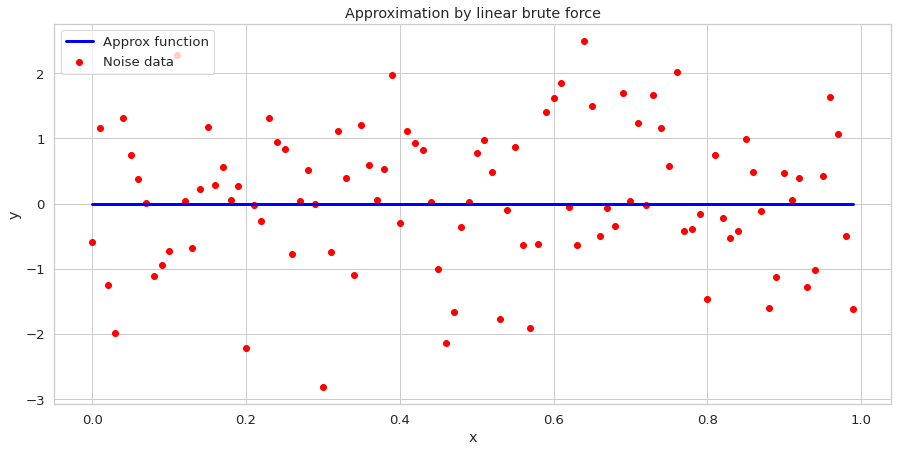

In [17]:
coeff_linear = brute_force_mult_dim(D_linear)
get_plot("Approximation by linear brute force", get_sample()[0], get_sample()[1], 
         linear_approximation(coeff_linear[0], coeff_linear[1])[0], 
         linear_approximation(coeff_linear[0], coeff_linear[1])[1])

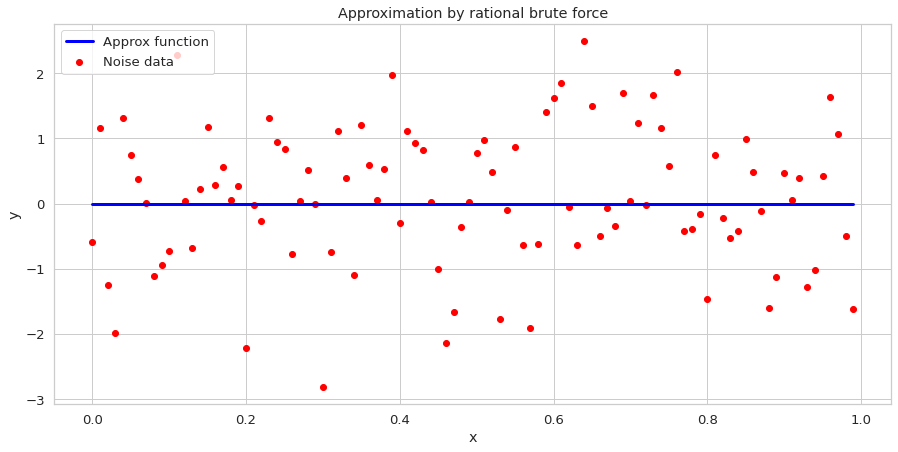

In [18]:
coeff_rational = brute_force_mult_dim(D_rational)
get_plot("Approximation by rational brute force", get_sample()[0], get_sample()[1], 
         rational_approximation(coeff_rational[0], coeff_rational[1])[0], 
         rational_approximation(coeff_rational[0], coeff_rational[1])[1])

In [19]:
def D1(x = []):  
    a = x[0]
    b = x[1]
    x = get_sample()[0]
    y = get_sample()[1]
    D_linear = 0
    for k in range(100):
      D_linear += ((a * x[k] + b) - y[k]) ** 2
    return D_linear

def D2(x = []):  
    a = x[0]
    b = x[1]
    x = get_sample()[0]
    y = get_sample()[1]
    D_rational = 0
    for k in range(100):
      D_rational += (a / (1 + b * x[k]) - y[k]) ** 2
    return D_rational

In [21]:
scipy.optimize.minimize(D1, [0, 0], method="Nelder-Mead")

 final_simplex: (array([[0.08684   , 0.05002038],
       [0.08680462, 0.05007453],
       [0.08674869, 0.05004972]]), array([115.17265386, 115.17265387, 115.17265392]))
           fun: 115.17265385541965
       message: 'Optimization terminated successfully.'
          nfev: 99
           nit: 51
        status: 0
       success: True
             x: array([0.08684   , 0.05002038])

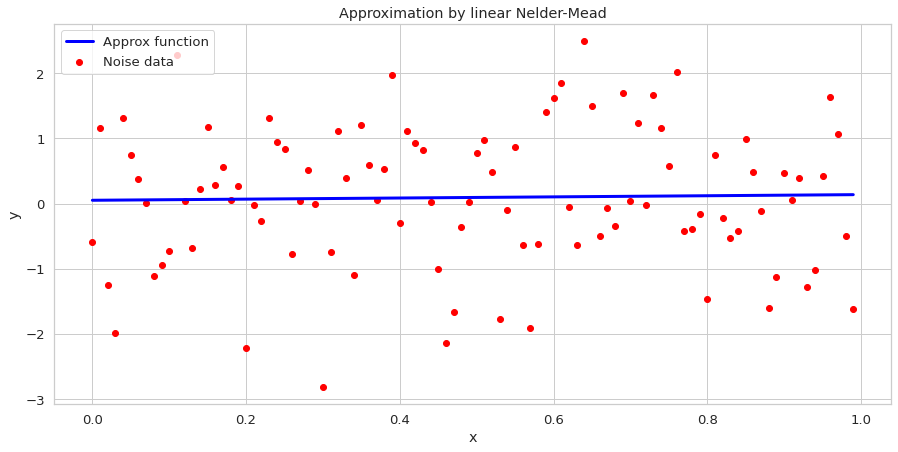

In [22]:
get_plot("Approximation by linear Nelder-Mead", get_sample()[0], get_sample()[1], 
         linear_approximation(0.08684, 0.05002038)[0], 
         linear_approximation(0.08684, 0.05002038)[1])

In [23]:
scipy.optimize.minimize(D2, [0, 0], method="Nelder-Mead")

 final_simplex: (array([[ 0.0826669 , -0.22812586],
       [ 0.08266364, -0.22820006],
       [ 0.08267056, -0.22811753]]), array([115.21764944, 115.21764944, 115.21764945]))
           fun: 115.21764944399698
       message: 'Optimization terminated successfully.'
          nfev: 119
           nit: 62
        status: 0
       success: True
             x: array([ 0.0826669 , -0.22812586])

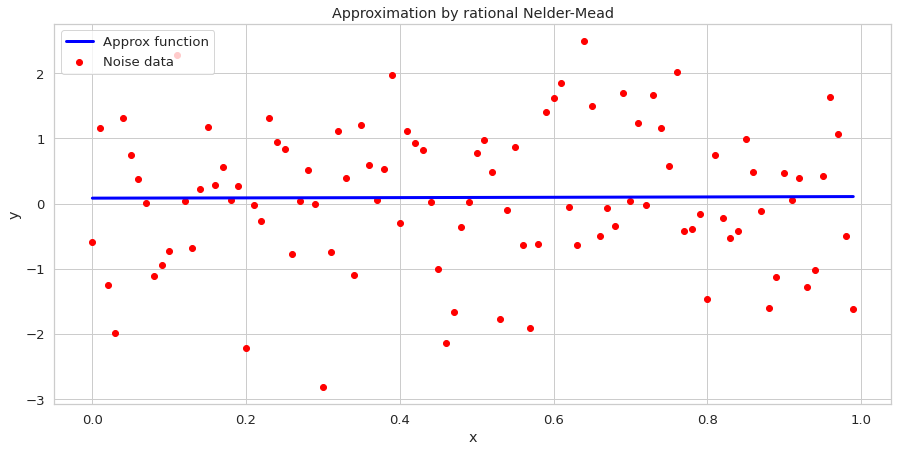

In [24]:
get_plot("Approximation by rational Nelder-Mead", get_sample()[0], get_sample()[1], 
         rational_approximation(0.0826669 , -0.22812586)[0], 
         rational_approximation(0.0826669 , -0.22812586)[1])

In [27]:
def gauss_method(test_function, init_approx, eps, max_iteration):
  a = init_approx[0]
  b = init_approx[1]
  a_min, b_min, x, iteration = 0, 0, 0, 0
  min_test_function = test_function([a, b])
  while iteration < max_iteration:
    for b in np.arange(init_approx[1] - 5, init_approx[1] + 5, eps/2):
      if test_function([a, b]) < min_test_function:
        if abs(test_function([a, b]) - min_test_function) < eps:
          min_test_function = test_function([a, b])
          b_min = b
          break
        min_test_function = test_function([a, b])
        b_min = b
      iteration += 1
    for a in np.arange(init_approx[1] - 5, init_approx[1] + 5, eps/2):
      if test_function([a, b]) < min_test_function:
        if abs(test_function([a, b]) - min_test_function) < eps:
          min_test_function = test_function([a, b])
          a_min = a
          break
        min_test_function = test_function([a, b])
        a_min = a
      iteration += 1
  return a_min, b_min, iteration

In [28]:
gauss_method(D1, [0, 0], 0.001, 10000)

(0.006499999997225281, 0.0834999999971826, 20180)

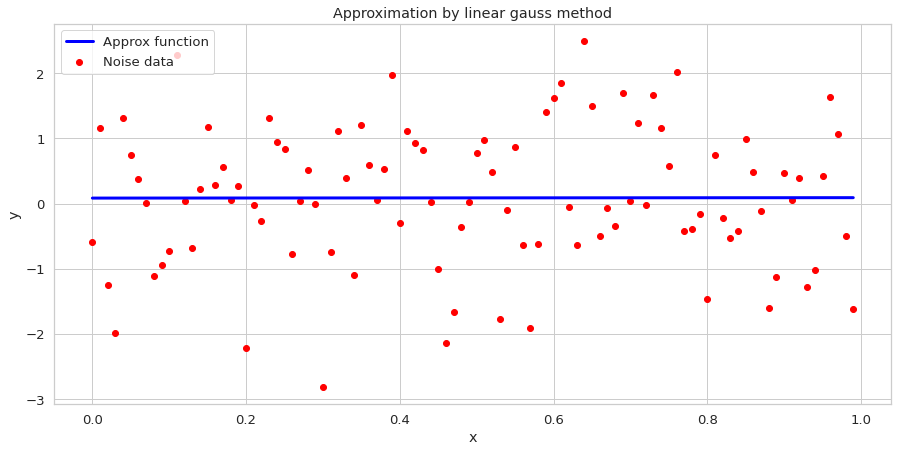

In [29]:
get_plot("Approximation by linear gauss method", get_sample()[0], get_sample()[1], 
         linear_approximation(0.006499999997225281, 0.0834999999971826)[0], 
         linear_approximation(0.006499999997225281, 0.0834999999971826)[1])

In [30]:
gauss_method(D2, [0, 0], 0.001, 10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


(0.06349999999719369, 0, 30127)

In [31]:
D2([0.06349999999719369, 0])

115.32256253825612

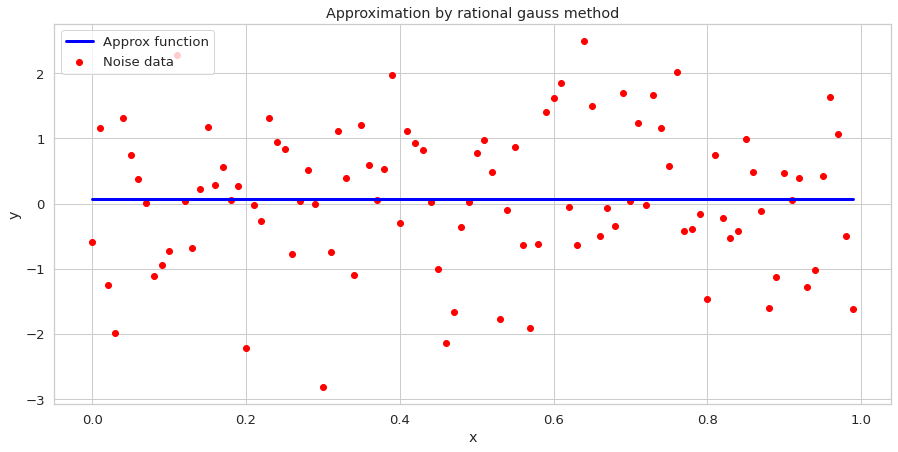

In [32]:
get_plot("Approximation by rational gauss method", get_sample()[0], get_sample()[1], 
         rational_approximation(0.06349999999719369, 0)[0], 
         rational_approximation(0.06349999999719369, 0)[1])